<a href="https://colab.research.google.com/github/sree-hari-s/EV-Market-Segmentation/blob/main/EV_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on Dataset 1

In [49]:
df = pd.read_excel('company_wise_sales.xlsx')

In [50]:
df.drop([0,1,2],axis=0,inplace=True)

In [51]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,OLA ELECTRIC,"1,65,589",NaN,NaN,NaN,TATA MOTOR,42701.0
4,HERO MOTORS,97812,NaN,NaN,NaN,MG MOTOR INDIA,5591.0
5,OKINAWA AUTOTECH,96648,NaN,NaN,NaN,BYD INDIA,1477.0
6,AMPERE VEHICLES,91604,NaN,NaN,NaN,HYUNDAI MOTOR INDIA,998.0
7,TVS MOTOR COMPANY,89961,NaN,NaN,NaN,MAHINDRA & MAHINDRA,668.0
8,ATHER ENERGY,83921,NaN,NaN,NaN,BMW INDIA PVT LTD,469.0
9,BAJAJ AUTO LTD,30339,NaN,NaN,NaN,KIA MOTORS INDIA,384.0
10,OKAYA EV PVT LTD,13510,NaN,NaN,NaN,PCA AUTOMOBILES INDIA,334.0
11,REVOLT INTELLICORP,13822,NaN,NaN,NaN,Others,1221.0
12,PUR ENERGY PVT LTD,13815,NaN,NaN,NaN,NaN,NaN


In [52]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [53]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [54]:
df.columns = ['2wheeler', '2wheeler_sales', '4wheeler', '4wheeler_sales']

In [55]:
df

,2wheeler,2wheeler_sales,4wheeler,4wheeler_sales
3,OLA ELECTRIC,"1,65,589",TATA MOTOR,42701.0
4,HERO MOTORS,97812,MG MOTOR INDIA,5591.0
5,OKINAWA AUTOTECH,96648,BYD INDIA,1477.0
6,AMPERE VEHICLES,91604,HYUNDAI MOTOR INDIA,998.0
7,TVS MOTOR COMPANY,89961,MAHINDRA & MAHINDRA,668.0
8,ATHER ENERGY,83921,BMW INDIA PVT LTD,469.0
9,BAJAJ AUTO LTD,30339,KIA MOTORS INDIA,384.0
10,OKAYA EV PVT LTD,13510,PCA AUTOMOBILES INDIA,334.0
11,REVOLT INTELLICORP,13822,Others,1221.0
12,PUR ENERGY PVT LTD,13815,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 3 to 13
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2wheeler        11 non-null     object 
 1   2wheeler_sales  11 non-null     object 
 2   4wheeler        9 non-null      object 
 3   4wheeler_sales  9 non-null      float64
dtypes: float64(1), object(3)
memory usage: 484.0+ bytes


In [58]:
df = df.fillna(0)

In [66]:
df['2wheeler_sales'][3] = df['2wheeler_sales'][3].replace(',', '')

<ipython-input-66-8394ad9a4a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2wheeler_sales'][3] = df['2wheeler_sales'][3].replace(',', '')


In [69]:
df['2wheeler_sales']=df['2wheeler_sales'].astype(int)
df['4wheeler_sales']=df['4wheeler_sales'].astype(int)

In [67]:
df

,2wheeler,2wheeler_sales,4wheeler,4wheeler_sales
3,OLA ELECTRIC,165589,TATA MOTOR,42701.0
4,HERO MOTORS,97812,MG MOTOR INDIA,5591.0
5,OKINAWA AUTOTECH,96648,BYD INDIA,1477.0
6,AMPERE VEHICLES,91604,HYUNDAI MOTOR INDIA,998.0
7,TVS MOTOR COMPANY,89961,MAHINDRA & MAHINDRA,668.0
8,ATHER ENERGY,83921,BMW INDIA PVT LTD,469.0
9,BAJAJ AUTO LTD,30339,KIA MOTORS INDIA,384.0
10,OKAYA EV PVT LTD,13510,PCA AUTOMOBILES INDIA,334.0
11,REVOLT INTELLICORP,13822,Others,1221.0
12,PUR ENERGY PVT LTD,13815,0,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 3 to 13
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   2wheeler        11 non-null     object
 1   2wheeler_sales  11 non-null     int64 
 2   4wheeler        11 non-null     object
 3   4wheeler_sales  11 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 484.0+ bytes


In [78]:
four_wheeler = df.drop(['2wheeler','2wheeler_sales'],axis=1)

In [80]:
four_wheeler=four_wheeler.drop([12,13],axis=0)
four_wheeler

,4wheeler,4wheeler_sales
3,TATA MOTOR,42701
4,MG MOTOR INDIA,5591
5,BYD INDIA,1477
6,HYUNDAI MOTOR INDIA,998
7,MAHINDRA & MAHINDRA,668
8,BMW INDIA PVT LTD,469
9,KIA MOTORS INDIA,384
10,PCA AUTOMOBILES INDIA,334
11,Others,1221


In [74]:
two_wheeler=df.drop(['4wheeler','4wheeler_sales'],axis=1)
two_wheeler

,2wheeler,2wheeler_sales
3,OLA ELECTRIC,165589
4,HERO MOTORS,97812
5,OKINAWA AUTOTECH,96648
6,AMPERE VEHICLES,91604
7,TVS MOTOR COMPANY,89961
8,ATHER ENERGY,83921
9,BAJAJ AUTO LTD,30339
10,OKAYA EV PVT LTD,13510
11,REVOLT INTELLICORP,13822
12,PUR ENERGY PVT LTD,13815


In [81]:
df.describe()

,2wheeler_sales,4wheeler_sales
count,11.000000,11.000000
mean,70832.545455,4894.818182
std,47850.149420,12635.966752
min,13510.000000,0.000000
25%,22080.500000,359.000000
50%,83921.000000,668.000000
75%,94126.000000,1349.000000
max,165589.000000,42701.000000


## Visualization

<Axes: >

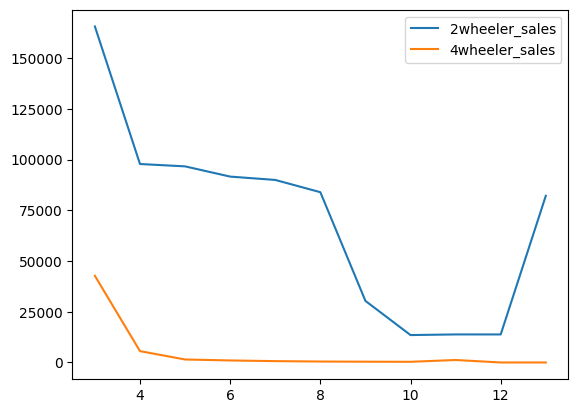

In [85]:
df.plot()

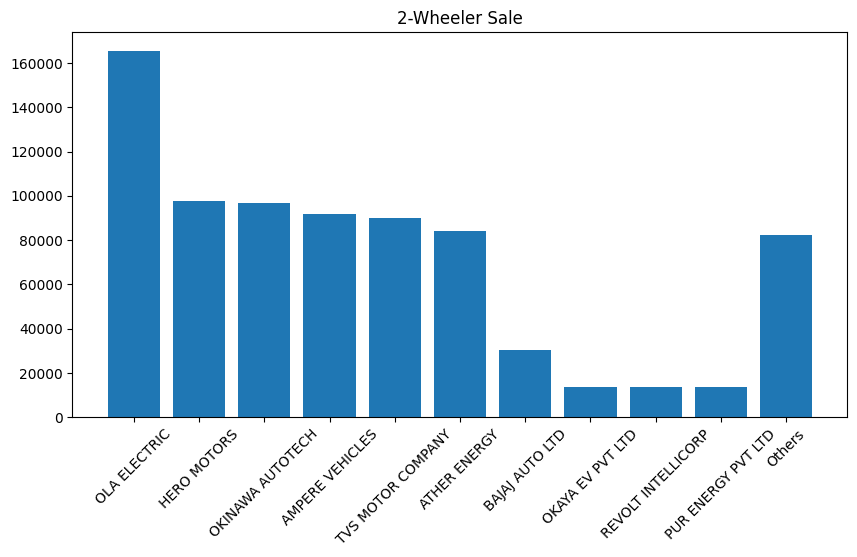

In [101]:
plt.figure(figsize=(10,5))
plt.bar(df['2wheeler'],df['2wheeler_sales'])
plt.title('2-Wheeler Sale')
plt.xticks(rotation=45)
plt.show()

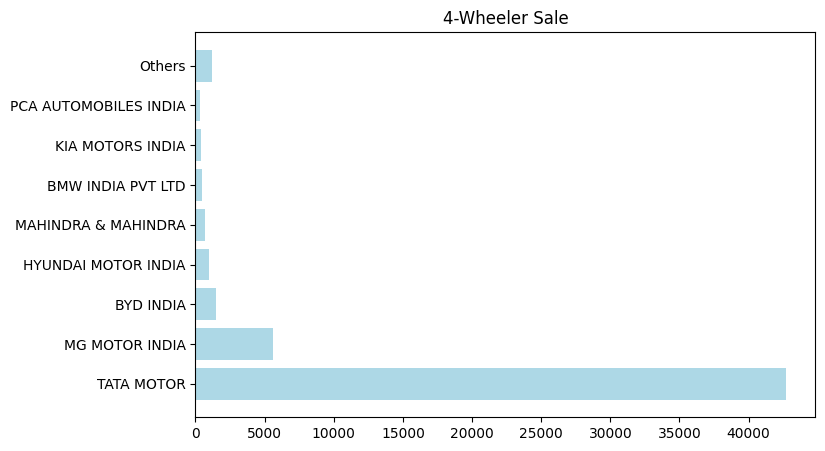

In [102]:
plt.figure(figsize=(8,5))
plt.barh(df['4wheeler'][0:9],df['4wheeler_sales'][0:9],color='lightblue')
plt.title('4-Wheeler Sale')
plt.show()

From the dataset we got an understanding that in the 2 wheelers most sales is going to OLA Electric and in 4 wheelers Tata motors have the highest sales.

# EDA on Dataset 2

In [103]:
df2= pd.read_csv('behaviour study.csv')

In [104]:
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [108]:
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',df2[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [112]:
df2=df2.replace(to_replace ="m", value ="No")

In [113]:
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',df2[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


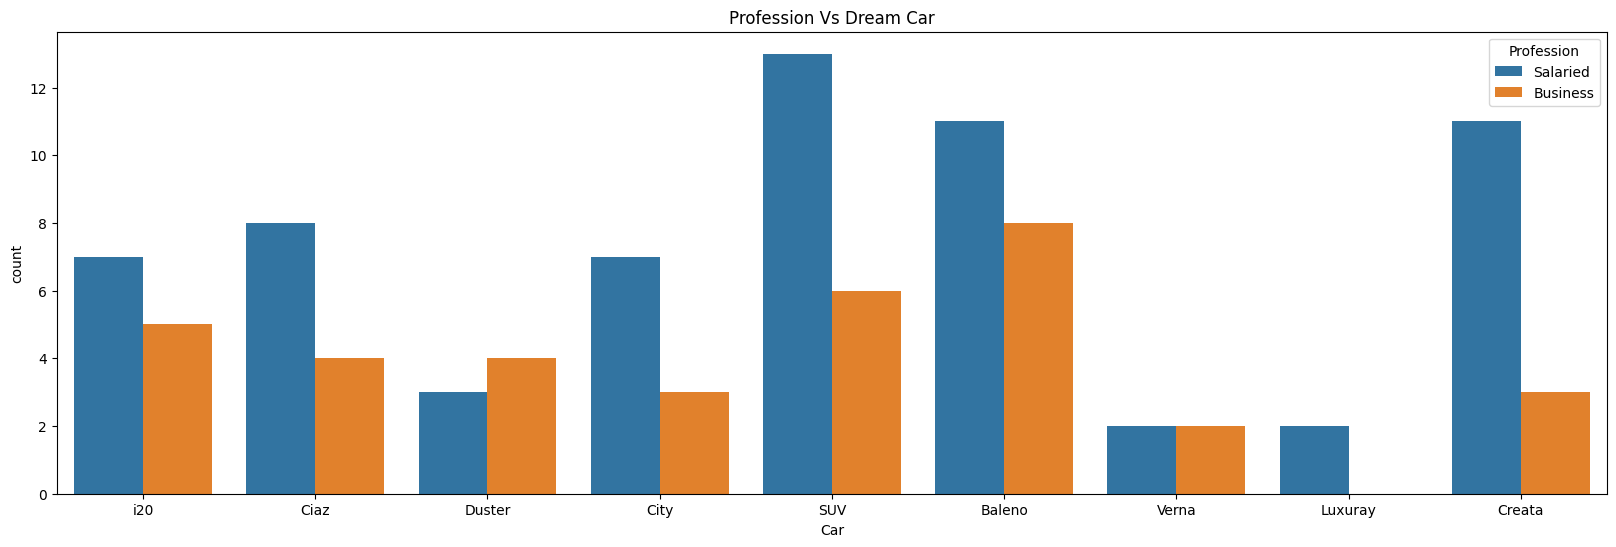

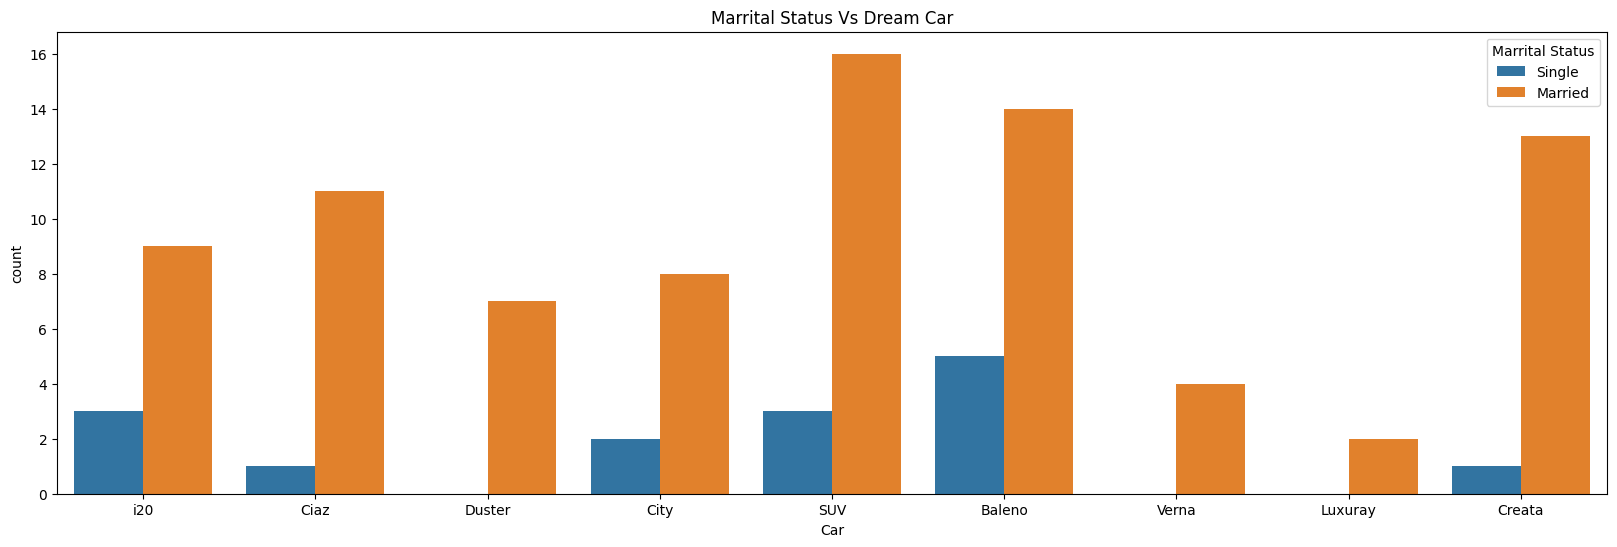

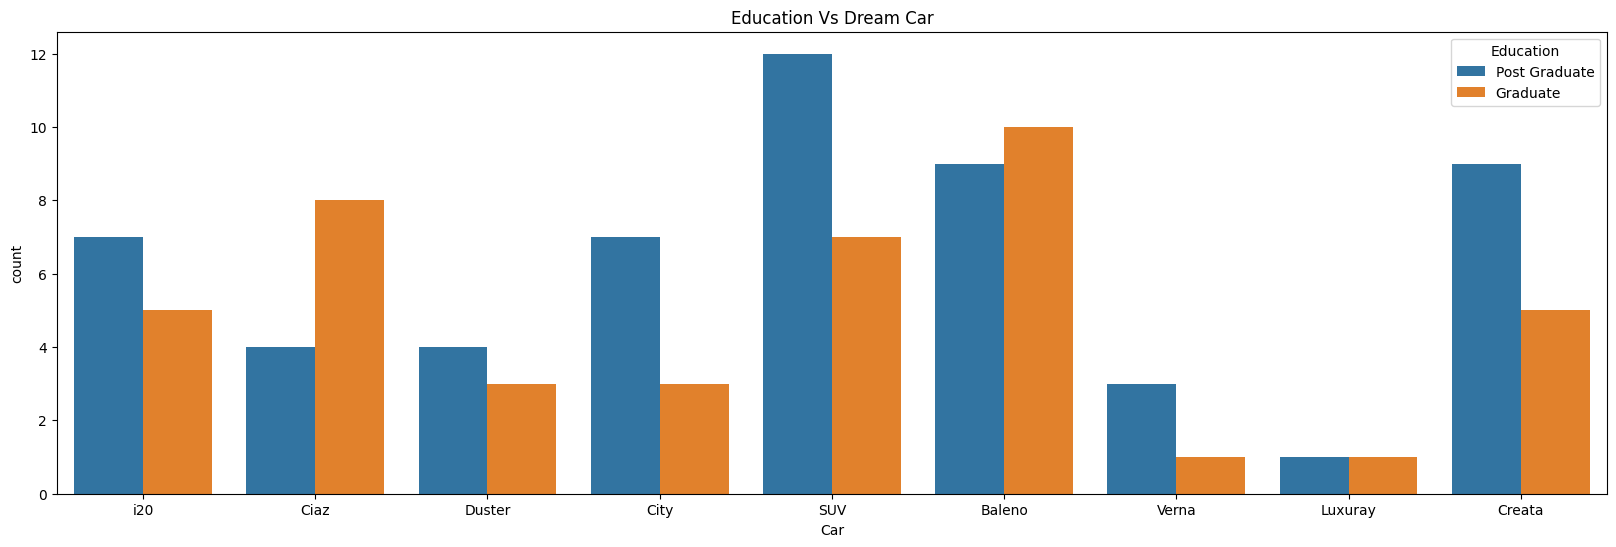

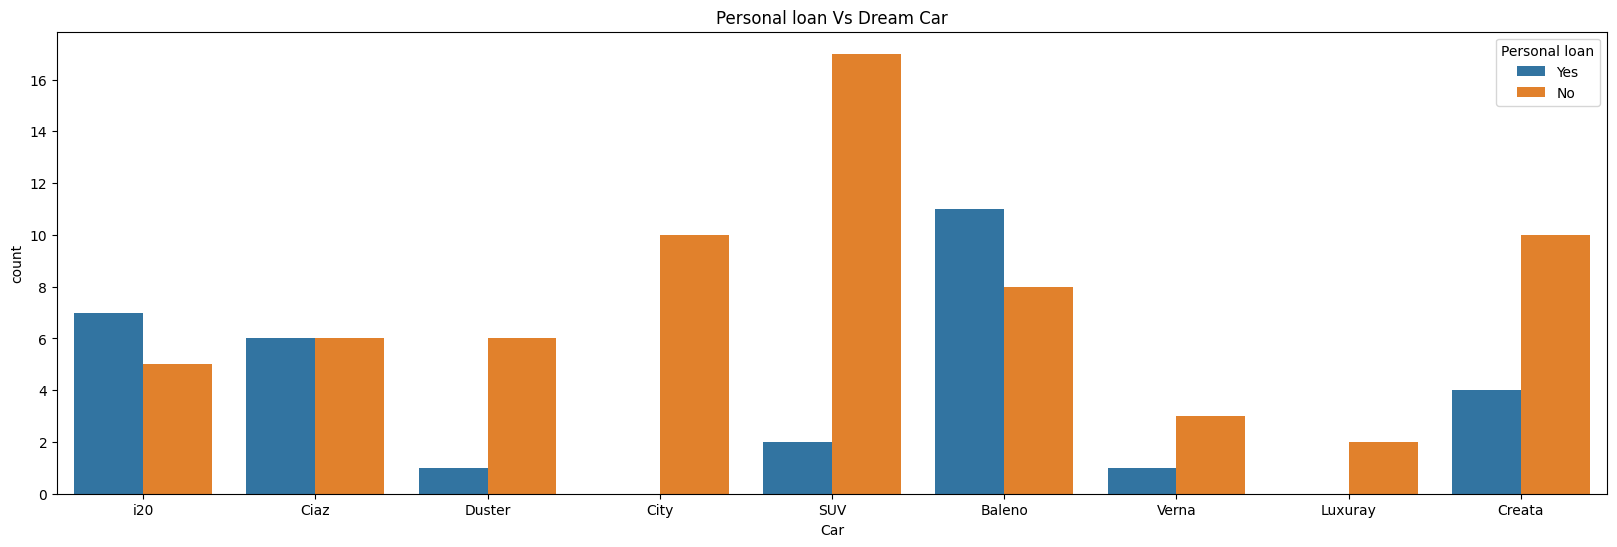

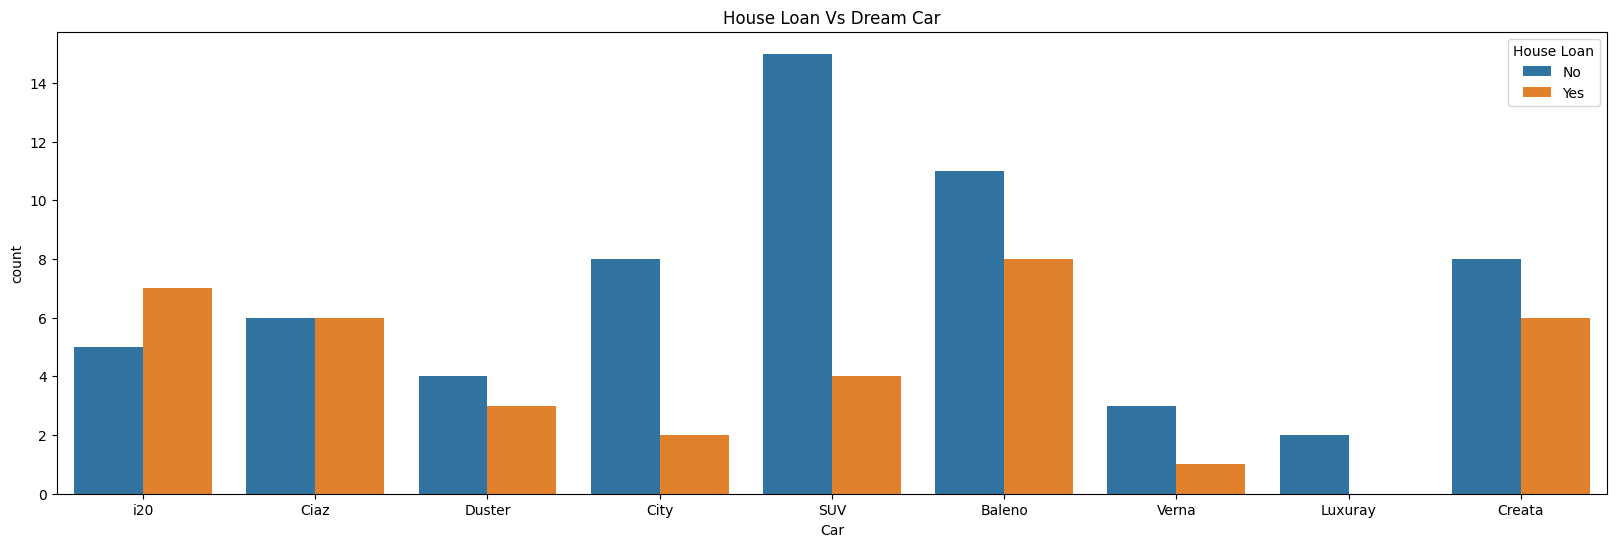

In [126]:
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','No of Dependents']:
    plt.figure(figsize=(20,6))
    plt.title(f"{col} Vs Dream Car")
    sns.countplot(x="Make",data=df2,hue=col)
    plt.xlabel('Car')
    plt.show()

<ipython-input-119-95b8cb38d3fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')


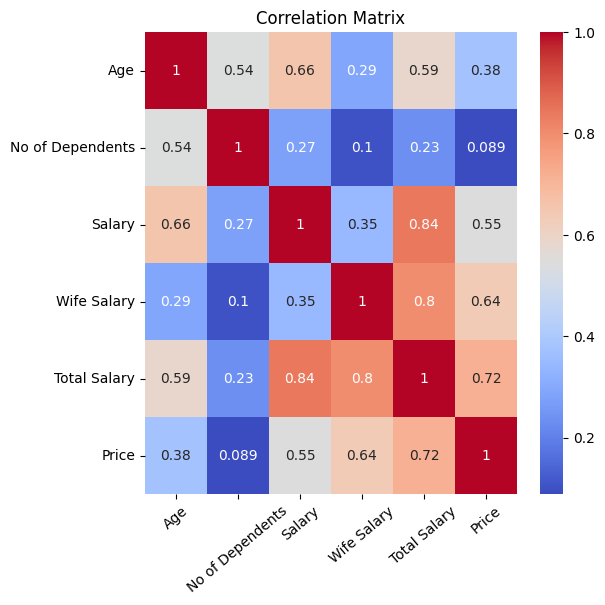

In [119]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')
plt.tick_params(axis='x', rotation=40)
plt.title('Correlation Matrix')
plt.show()

This dataset contained the information behaviour of the people who tends to buy vehicles, which can be seen graphically.

In [127]:
data = pd.read_excel('ev_sales.xlsx')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [129]:
X_usage = data[['2 W', '3 W', '4 W', 'TOTAL']]

# Convert 'YEAR' to timestamp
X_usage['YEAR'] = pd.to_datetime(data['YEAR']).astype('int64') // 10**9

<ipython-input-129-dcd4987c93b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_usage['YEAR'] = pd.to_datetime(data['YEAR']).astype('int64') // 10**9


In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [131]:
# Standardize the data
scaler = StandardScaler()
X_scaled_usage = scaler.fit_transform(X_usage)

In [132]:
# Choose the optimal K for usage pattern (e.g., based on the elbow method)
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled_usage)
    distortions.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

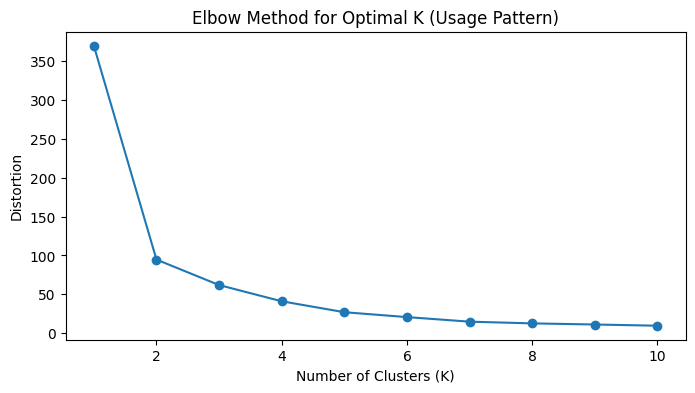

In [133]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K (Usage Pattern)')
plt.show()

In [134]:
optimal_k_usage = 3

# Perform K-means clustering for usage pattern
kmeans_usage = KMeans(n_clusters=optimal_k_usage, random_state=0)
clusters_usage = kmeans_usage.fit_predict(X_scaled_usage)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
# Add cluster labels for usage pattern to the original dataset
data['Cluster_Usage'] = clusters_usage

In [136]:
data

,YEAR,2 W,3 W,4 W,BUS,TOTAL,Cluster_Usage
0,2017-04-01,96,4748,198,0,5042,0
1,2017-05-01,91,6720,215,2,7028,0
2,2017-06-01,137,7178,149,1,7465,0
3,2017-07-01,116,8775,120,0,9011,0
4,2017-08-01,99,8905,137,0,9141,0
...,...,...,...,...,...,...,...
69,2023-01-01,64649,34308,3490,98,102545,1
70,2023-02-01,66033,35995,4850,99,106977,1
71,2023-03-01,86194,45225,8852,89,140360,1
72,2023-04-01,66755,38016,6193,84,111048,1


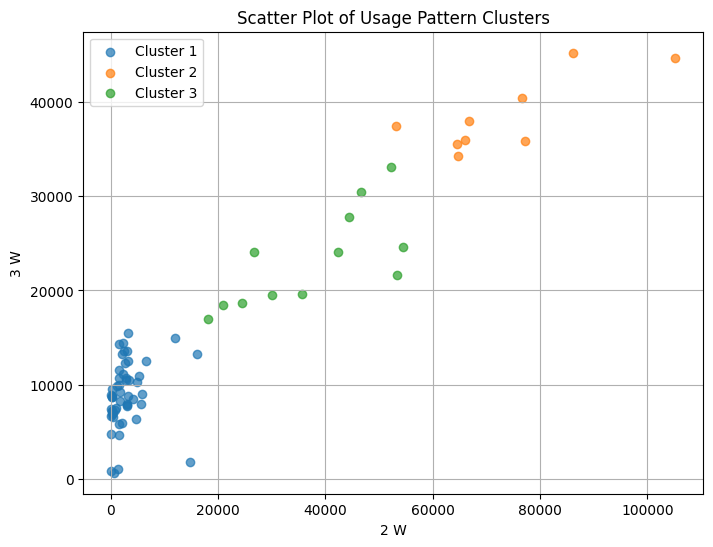

In [137]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k_usage):
    plt.scatter(
        data[data['Cluster_Usage'] == cluster]['2 W'],
        data[data['Cluster_Usage'] == cluster]['3 W'],
        label=f'Cluster {cluster + 1}',
        alpha=0.7
    )
plt.xlabel('2 W')
plt.ylabel('3 W')
plt.title('Scatter Plot of Usage Pattern Clusters')
plt.legend()
plt.grid()
plt.show()